In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def normalize_features(X):
  #Normalize features to have zero and unit variance
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  X_normalized=(X-mean)/std
  return X_normalized,mean,std

In [ ]:
def compute_cost(X,y,theta):
  #Computing the mean squared error
  m=len(y)
  predictions=np.dot(X,theta)
  cost=np.sum((predictions-y)**2)/(2*m)
  return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate,num_iterations,print_cost_interval=100):
  #Perform gradient descent to optimize theta
  m=len(y)
  cost_history=[]
  for i in range(num_iterations):
    predictions=np.dot(X,theta)
    errors=predictions-y
    theta-=(learning_rate/m)*np.dot(X.T,errors)
    cost=compute_cost(X,y,theta)
    cost_history.append(cost)
    if i % print_cost_interval==0:
      print(f"Iteration {i},Cost: {cost}")
  return theta,cost_history

In [ ]:
def r_sqaured(y_true,y_pred):
  #Compute R-sqaured score
  ss_total=np.sum((y_true-np.mean(y_true))**2)
  ss_residual=np.sum((y_true-y_pred)**2)
  r2=1-(ss_residual/ss_total)
  return r2

In [ ]:
df=pd.read_csv('/content/sample_data/Lineardata_train.csv')
df

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-7567.227845,2.029910,-0.928164,-2.463563,5.312071,2.070290,0.835355,-4.421930,18.292309,-10.357047,...,-2.827488,17.940836,25.724137,-29.713820,0.625372,-183.410260,19.439815,6.640099,-41.093484,-1.010290
49996,-9973.851789,-0.223475,0.341542,-4.423256,-0.104668,4.384320,-2.290826,4.612476,29.667901,-9.675776,...,-17.744738,-0.708422,15.907878,10.865072,-31.280568,-354.186800,6.363459,0.370644,35.952861,3.752642
49997,-8246.697221,-0.321085,1.608386,-11.177100,-1.140550,-10.832891,-8.625981,-27.740091,-14.166217,9.169728,...,3.841781,-17.941987,-2.167623,11.336067,-2.542123,-98.327808,-13.690353,-4.299753,16.053032,14.812715
49998,-9101.101377,-2.383432,1.214911,0.925113,0.017874,2.022561,1.209647,5.006908,-12.043059,-5.756141,...,5.308136,12.387029,20.220357,-1.359887,83.958829,-314.127483,-2.550699,-5.082801,7.514089,30.150485


In [ ]:
df_np=df.to_numpy()
df_np.shape

(50000, 21)

In [ ]:
X,y=df_np[:,1:],df_np[:,0:1]
X.shape,y.shape

((50000, 20), (50000, 1))

In [ ]:
y

array([[ -5928.10274562],
       [  -738.89085527],
       [-20186.84158668],
       ...,
       [ -8246.69722146],
       [ -9101.10137698],
       [  3420.72986003]])

In [ ]:
def train_test_split(X,y,test_ratio=0.2,random_seed=None):
  if random_seed is not None:
    np.random.seed(random_seed)
  #Shuffle indices
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  #Calculate the number of samples for testing
  test_size=int(X.shape[0]*test_ratio)
  #Split the data
  test_indices=indices[:test_size]
  train_indices=indices[test_size:]
  X_train,X_test=X[train_indices],X[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test

In [ ]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_ratio=0.2,random_seed=42)

In [ ]:
X_train.shape,X_test.shape

((40000, 20), (10000, 20))

In [ ]:
y_train.shape

(40000, 1)

In [ ]:
#Normalize features
X_normalized,mean,std=normalize_features(X_train)

In [ ]:
X_normalized

array([[-1.45775205, -0.48757813,  1.08269692, ..., -1.16065271,
        -0.90891443,  0.98677163],
       [-0.33240745,  0.43686615, -0.67175291, ...,  2.01739815,
        -0.15981407, -0.10383174],
       [-0.74925428,  0.48095683, -0.54168024, ..., -0.37290956,
         1.21023425,  0.7553406 ],
       ...,
       [ 1.74080701, -0.52089606,  0.09435555, ..., -0.82256806,
        -0.43292423,  0.26915817],
       [-1.38438685, -1.30408921, -0.08026594, ..., -0.30972753,
         1.4668701 ,  1.7918175 ],
       [ 1.28782662, -0.60347955, -0.8443776 , ..., -0.12723843,
         0.79892582, -0.95683495]])

In [ ]:
#Add bias therm to the features
X_normalized_b=np.c_[np.ones((X_normalized.shape[0],1)),X_normalized]

In [ ]:
#Initialize the weights
theta=np.random.randn(X_normalized_b.shape[1],1)

In [ ]:
#Set hyperparameters
learning_rate=0.01
num_iterations=1000

In [ ]:
#Perform gradient descent
theta,cost_history=gradient_descent(X_normalized_b,y_train,theta,learning_rate,num_iterations)


Iteration 0,Cost: 63931001.22195706
Iteration 100,Cost: 8604849.547788186
Iteration 200,Cost: 1159609.4399933873
Iteration 300,Cost: 156465.08524298744
Iteration 400,Cost: 21137.84113280586
Iteration 500,Cost: 2859.180766622486
Iteration 600,Cost: 387.22507727882595
Iteration 700,Cost: 52.51123148756628
Iteration 800,Cost: 7.13353581900828
Iteration 900,Cost: 0.9740332888061018


In [ ]:
#Make predictions
X_test_normalized=(X_test-mean)/std
X_test_normalized_b=np.c_[np.ones((X_test_normalized.shape[0],1)),X_test_normalized]
predictions=np.dot(X_test_normalized_b,theta)

In [ ]:
#Compute R-squared score
r2=r_sqaured(y_test,predictions)

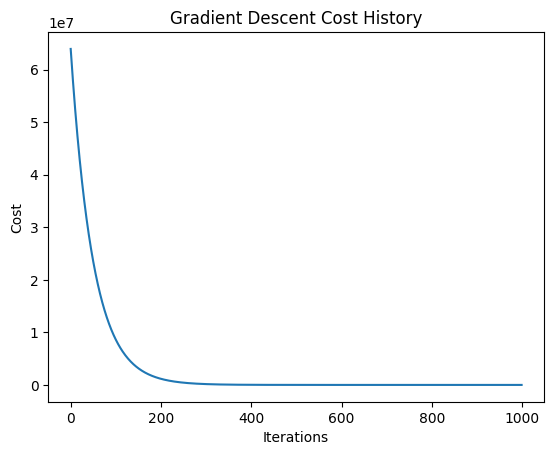

In [ ]:
#Plot cost history
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost History')
plt.show()

In [ ]:
print("Theta (weights):",theta)
print("Predictions for X_test:",predictions)
print("R-sqaured score:",r2)

Theta (weights): [[4.77181723e+01]
 [2.20174978e+01]
 [3.30799054e+01]
 [9.93022143e+00]
 [6.03820733e+00]
 [1.75687581e+02]
 [3.28524896e+02]
 [2.53313500e+02]
 [9.01033415e+02]
 [4.35629433e+02]
 [8.37967293e+01]
 [1.20994216e+02]
 [1.60878733e+03]
 [1.67729932e+03]
 [1.31393215e+03]
 [5.98664680e+02]
 [1.05469382e+04]
 [5.04253293e+02]
 [6.78789845e+02]
 [3.16337452e+03]
 [2.30368095e+02]]
Predictions for X_test: [[  5052.47080807]
 [ -3879.37770314]
 [  1797.34650158]
 ...
 [-27101.96550725]
 [-11309.99561889]
 [   623.30654986]]
R-sqaured score: 0.9999999978525291


On the test dataset

In [ ]:
pf=pd.read_csv('/content/sample_data/Lineardata_test.csv')
pf

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19851,1.967136,-6.819440,3.597360,-0.482508,4.679231,0.861442,8.810749,-20.384415,20.427585,...,1.489196,12.767614,52.530303,20.517596,-42.428871,35.227784,-9.244004,-18.759314,-42.260514,-2.261597
9996,11818,-0.656285,-3.294604,12.222256,-0.184108,8.286414,-6.437312,-19.611691,-13.487207,23.986240,...,9.897794,-15.720693,26.401396,11.421553,-104.558180,-318.607244,-7.446830,-6.457686,12.002813,-20.317446
9997,15552,-0.349932,4.611955,-2.814735,1.851754,-2.354195,6.639817,-25.299515,-3.145723,-41.248652,...,19.601819,-3.216492,-17.299449,-8.975811,59.531358,244.333157,28.656620,11.294024,1.441938,4.395482
9998,12161,0.295833,1.825552,-8.824731,2.119270,-4.629213,-2.354794,0.919091,52.204003,7.350877,...,10.640964,11.686231,7.259193,7.733906,54.680591,-472.335102,-24.281308,-16.099344,10.744757,6.578695


In [ ]:
pf_np=pf.to_numpy()
pf_np.shape

(10000, 21)

In [ ]:
P_test,q_test=df_np[:,1:],df_np[:,0:1]
P_test.shape,q_test.shape

((10000, 20), (10000, 1))

In [ ]:
#Normalize features
P_test_normalized,mean,std=normalize_features(P_test)

In [ ]:
#Add bias therm to the features
P_test_normalized_b=np.c_[np.ones((P_test_normalized.shape[0],1)),P_test_normalized]

In [ ]:
#Make predictions
predictions_test=np.dot(P_test_normalized_b,theta)

In [ ]:
#Compute R-squared score
r2=r_sqaured(q_test,predictions_test)

In [ ]:
print("Predictions for X_test:",predictions)
print("R-sqaured score:",r2)

Predictions for X_test: [[  5052.47080807]
 [ -3879.37770314]
 [  1797.34650158]
 ...
 [-27101.96550725]
 [-11309.99561889]
 [   623.30654986]]
R-sqaured score: -42.321510333945334
